# 라이브러리 및 모듈 호출

In [16]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# 데이터 불러오기

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# 데이터 확인

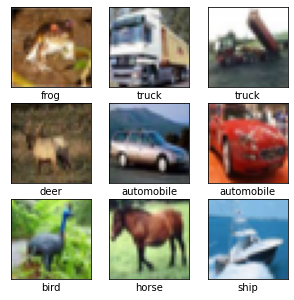

In [3]:
np.random.seed(3)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i , idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

# 데이터 전처리

In [4]:
x_mean = np.mean(x_train, axis=(0,1,2)) # rgb 채널별로 평균과 표준편차 구하기
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train-x_mean)/x_std
x_test = (x_test-x_mean)/x_std

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


# 모델 구성 및 컴파일

In [5]:
model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])

# 모델 학습

In [6]:
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 21s 12ms/step - loss: 1.6207 - acc: 0.4143 - val_loss: 1.4084 - val_acc: 0.4937
Epoch 2/30
1094/1094 [==============================] - 12s 11ms/step - loss: 1.2679 - acc: 0.5470 - val_loss: 1.1797 - val_acc: 0.5802
Epoch 3/30
1094/1094 [==============================] - 12s 11ms/step - loss: 1.0874 - acc: 0.6152 - val_loss: 1.0633 - val_acc: 0.6198
Epoch 4/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.9471 - acc: 0.6681 - val_loss: 0.9521 - val_acc: 0.6639
Epoch 5/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.8435 - acc: 0.7050 - val_loss: 0.8919 - val_acc: 0.6875
Epoch 6/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.7540 - acc: 0.7383 - val_loss: 0.8751 - val_acc: 0.6930
Epoch 7/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.6766 - acc: 0.7653 - val_loss: 0.8204 - val_acc: 0.7149
Epoch 8/30
1094/1094 [==========================

# 학습 과정 시각화

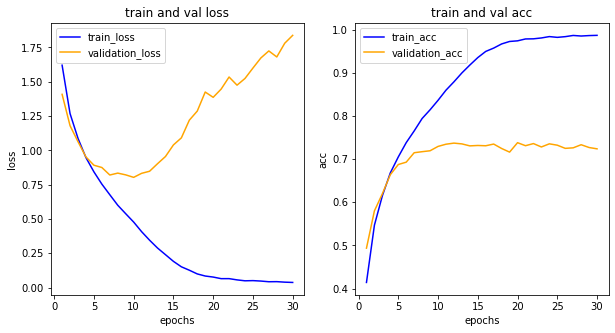

In [7]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

# 신경망 시각화

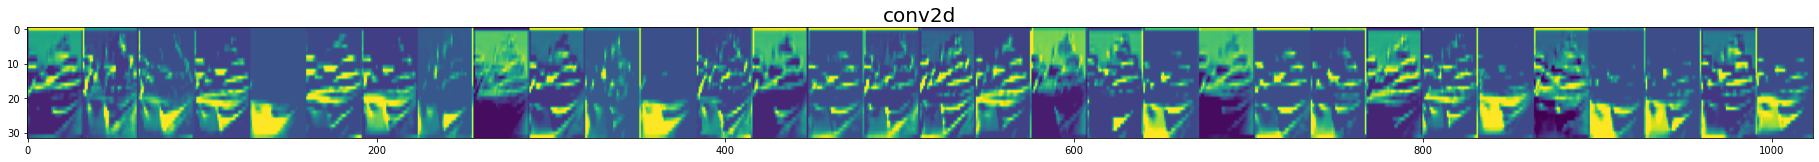

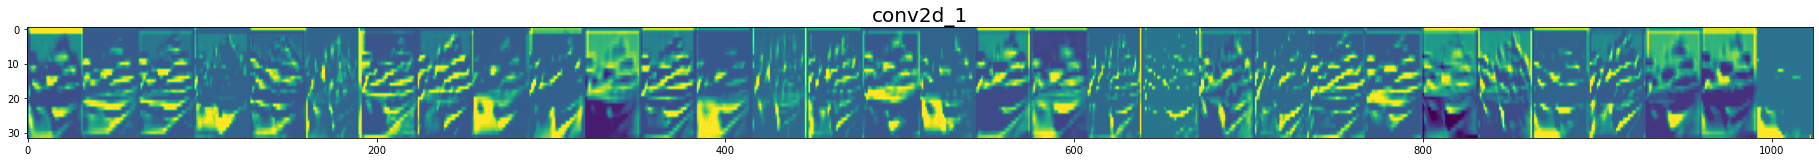

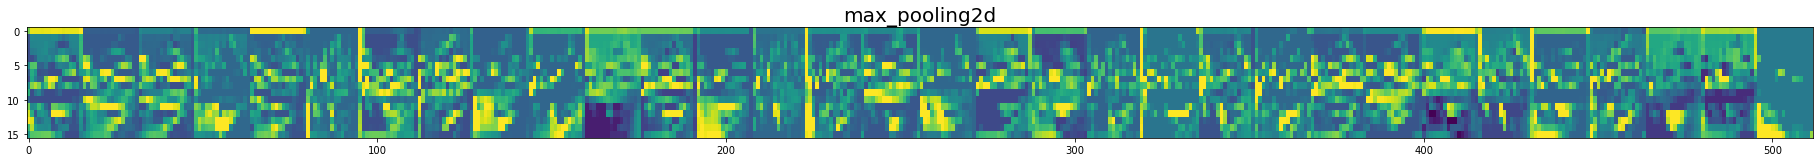

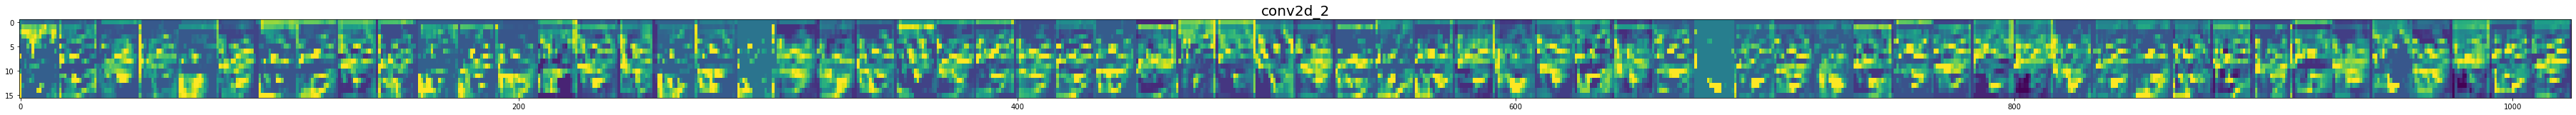

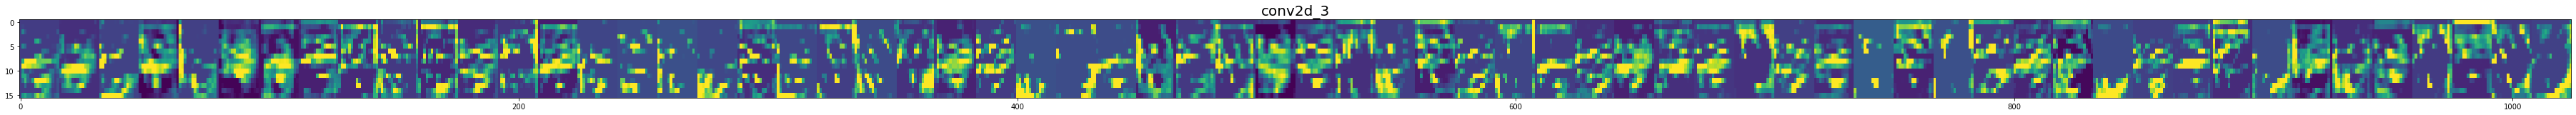

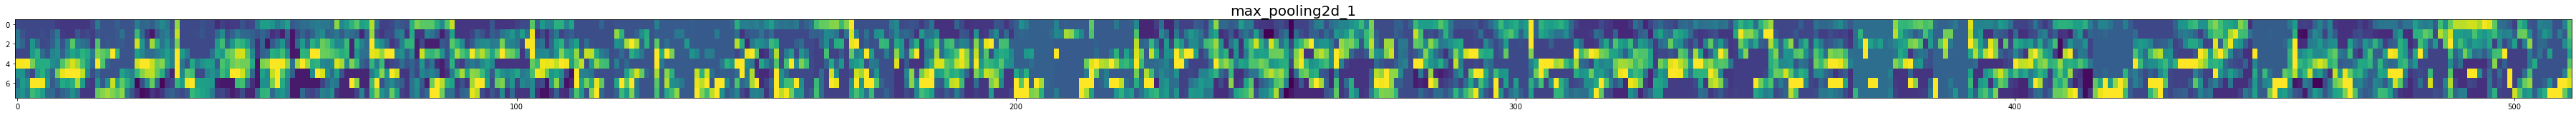

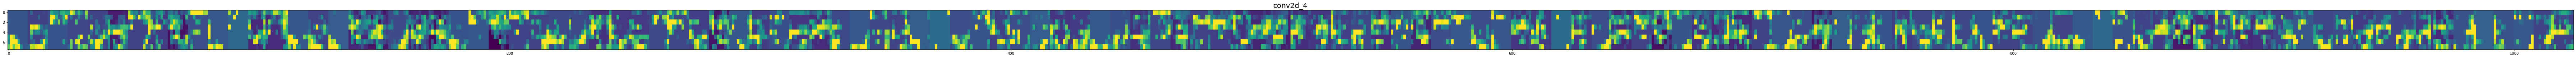

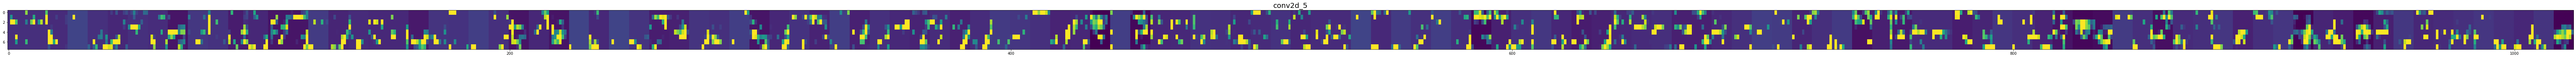

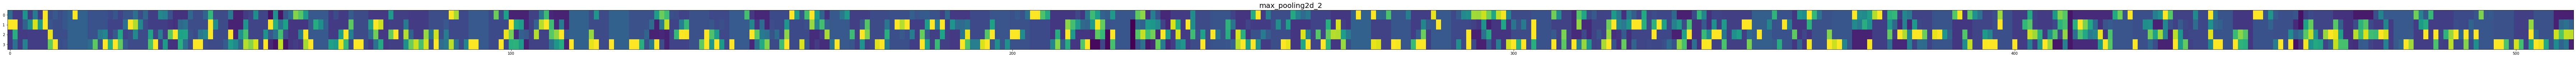

In [15]:
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output)

test_img = np.expand_dims(x_test[1], axis=0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    if(len(feature_map.shape)==4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        display_grid = np.zeros((img_size, img_size*features))
        
        for i in range(features):
            x = feature_map[0,:,:,i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')
            display_grid[:, i*img_size:(i+1)*img_size] = x
        
        plt.figure(figsize=(features, 2+1./features))
        plt.title(layer_name, fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

# 과적합 방지 : 규제

Epoch 1/30
1094/1094 [==============================] - 15s 13ms/step - loss: 1.8226 - acc: 0.4068 - val_loss: 1.5536 - val_acc: 0.5136
Epoch 2/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.4404 - acc: 0.5460 - val_loss: 1.3269 - val_acc: 0.5905
Epoch 3/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.2503 - acc: 0.6186 - val_loss: 1.2262 - val_acc: 0.6245
Epoch 4/30
1094/1094 [==============================] - 14s 12ms/step - loss: 1.1189 - acc: 0.6663 - val_loss: 1.1365 - val_acc: 0.6585
Epoch 5/30
1094/1094 [==============================] - 13s 12ms/step - loss: 1.0161 - acc: 0.7004 - val_loss: 1.0910 - val_acc: 0.6707
Epoch 6/30
1094/1094 [==============================] - 14s 12ms/step - loss: 0.9308 - acc: 0.7288 - val_loss: 1.0437 - val_acc: 0.6922
Epoch 7/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.8474 - acc: 0.7601 - val_loss: 0.9871 - val_acc: 0.7125
Epoch 8/30
1094/1094 [==========================

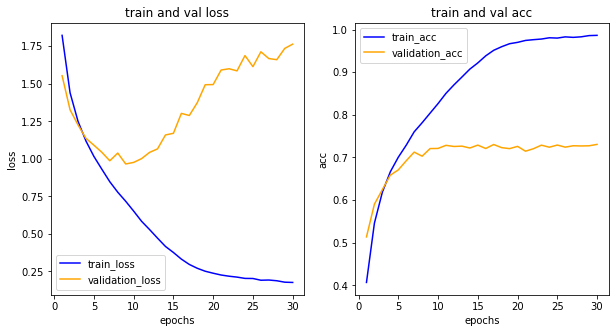

In [18]:
# 위의 과정에서 kernel_regulizer 옵션만 추가
model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

## 규제하지 않은 경우랑 큰 차이가 없다...
## 원래는 조금 더 안정적인 그래프가 나와야 정상임